## DPD: 911 Calls for service 

#### Introduction: 

In my first assignment I have analyzed 911 Calls for Service for the City of Detroit. Being a student of Wayne State and resident of Detroit, I felt curious to look at the facts about how safe are residents of Detroit and what kind of crimes are reported the most. 

This dataset contains all 911 police emergency response and officer-initiated calls for service in the City of Detroit beginning September 20, 2016 until Jan 30, 2018. Emergency response calls are the result of people calling 911 to request police services. Officer-initiated calls include traffic stops, street investigations and other policing activities (such as observing crimes in progress) where police officers initiate the response. The data includes all calls taken, dispatch, travel, and total response times for those calls serviced by a police agency.

Source of the data :https://data.detroitmi.gov/Public-Safety/DPD-911-Calls-for-Service-September-20-2016-Presen/wgv9-drfc

I have used Pandas, Matplotlib, Seaborn and Plotly libraries to clean, analyze and visualize this dataset.

#### Import the libraries

In [85]:
# Importing all the libraries to load and visualize the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go

#### Load the data

In [86]:
# Load the csv dataset into a pandas dataframe
dpd = pd.read_csv('./datasets/DPD__911_Calls_for_Service__September_20__2016_-_Present.csv')

Let's take a quick look at how the data looks like.

In [87]:
# Loading the top three rows of the dataset
dpd.head(3)

,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,Time of Call,...,Travel Time,Total Response Time,Time On Scene,Total Time,Neighborhood,Census Block GEOID,Council District,Longitude,Latitude,Incident Location
0,201732500933,DPD,18000 block of FENELON ST,48234,3.0,W8190,TOWING DETAIL,TOW,11/21/2017 10:00:37 AM,10:00:37 AM,...,0.0,0.0,0.3,0.3,Krainz Woods,2.616351e+14,3.0,-83.053139,42.426768,"location\n(42.4267677150286, -83.0531386691358)"
1,201732500926,DPD,16800 block of PLYMOUTH RD,48227,1.0,802010,HOLD UP ALARM AND MOW,HOLDUP,11/21/2017 09:55:48 AM,9:55:48 AM,...,8.1,13.3,11.3,24.5,Plymouth-I96,2.616355e+14,7.0,-83.211044,42.372283,"location\n(42.3722830005363, -83.2110440429126)"
2,201733100578,DPD,6000 block of DREXEL ST,48213,3.0,825030,DISTURBANCE,DISTURB,11/27/2017 05:30:02 AM,5:30:02 AM,...,NaN,NaN,NaN,NaN,Chandler Park,2.616351e+14,4.0,-82.970480,42.401256,"location\n(42.4012558683492, -82.9704795227327)"


In [88]:
# Check out the schema of the dataset
print dpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819816 entries, 0 to 819815
Data columns (total 25 columns):
Incident ID                819816 non-null int64
Agency                     819816 non-null object
Incident Address           819816 non-null object
Zip Code                   819816 non-null object
Priority                   819049 non-null float64
Call Code                  819816 non-null object
Call Description           819816 non-null object
Category                   819816 non-null object
Call Time                  819816 non-null object
Time of Call               819816 non-null object
Precinct/Scout Car Area    819816 non-null object
Responding Unit            313241 non-null object
Officer Initiated          819816 non-null object
Intake Time                803002 non-null float64
Dispatch Time              721132 non-null float64
Travel Time                705419 non-null float64
Total Response Time        705419 non-null float64
Time On Scene              691625 n

There are 819816 observations with 25 columns. From the above information table it is clear that quite a few no. of columns contain missing values. So, let's validate that first before jumping into the dataset.


In [89]:
# Function to calculate total no. of missing values
def check_missing(list_values):
    return list_values.isnull().sum()


print "No. of missing values in different columns:"
dpd.apply(check_missing)        

No. of missing values in different columns:


Incident ID                     0
Agency                          0
Incident Address                0
Zip Code                        0
Priority                      767
Call Code                       0
Call Description                0
Category                        0
Call Time                       0
Time of Call                    0
Precinct/Scout Car Area         0
Responding Unit            506575
Officer Initiated               0
Intake Time                 16814
Dispatch Time               98684
Travel Time                114397
Total Response Time        114397
Time On Scene              128191
Total Time                 111808
Neighborhood                60278
Census Block GEOID          46559
Council District            58575
Longitude                   46548
Latitude                    46548
Incident Location           46548
dtype: int64

ABSOLUTELY RIGHT!!!! Quite large no. of missing values. Let's handle them as needed.

There are 767 missing values in Priority. Since this column contains categorical(ordinal) values.


In [90]:
dpd['Priority'].value_counts()

3.0    372981
2.0    286967
1.0     96028
4.0     55084
5.0      7985
7.0         2
9.0         2
Name: Priority, dtype: int64

Quite clearly 3.0 is the most commonly occurring value in the whole dataset. So, let's replace the missing Priority values with 3.0

In [92]:
dpd['Priority'].fillna(value=3.0,inplace=True)

Total Response Time column also has a lot of values missing too! So, the appropriate value to replace them with should be zero in this case.

In [93]:
dpd['Total Response Time'].fillna(value=0.0,inplace=True)

In [94]:
# Check out the missing values again
print "No. of missing values in different columns:"
dpd.apply(check_missing)

No. of missing values in different columns:


Incident ID                     0
Agency                          0
Incident Address                0
Zip Code                        0
Priority                        0
Call Code                       0
Call Description                0
Category                        0
Call Time                       0
Time of Call                    0
Precinct/Scout Car Area         0
Responding Unit            506575
Officer Initiated               0
Intake Time                 16814
Dispatch Time               98684
Travel Time                114397
Total Response Time             0
Time On Scene              128191
Total Time                 111808
Neighborhood                60278
Census Block GEOID          46559
Council District            58575
Longitude                   46548
Latitude                    46548
Incident Location           46548
dtype: int64

No missing value in Call descriptions or categories columns. 


#### Question : What are the reasons behind these 911 calls for service?

In [95]:
reason = dpd['Call Description'].unique()
print "No. of unique reasons for 911 Calls : {}".format(len(reason))

No. of unique reasons for 911 Calls : 219


Interesting!!! Quite a few reasons. Let's look at the top 20 reasons for such calls.

In [12]:
Call=dpd['Call Description'].value_counts()
Call=Call.head(20)

callsDf = [go.Bar(
            x=Call.index,
            y=Call.values,            
)]


layout = go.Layout(
    title="Top 20 reasons for 911 calls from Sep,2016 to Jan, 2018",
)

fig = go.Figure(data=callsDf, layout=layout)
#layout = dict(title="Top 20 reasons for 911 calls from Sep,2016 to Jan,2018")

py.iplot(fig,filename='callsDf-bar')

#### Question: Which day of the week has had the highest no. of 911 calls?

To answer this question, we need to parse the "Call time" column which contains date and time in string format.So, let's go ahead and extract year, month, dayofweek and time of call by adding new columns in the dataframe.

In [96]:
# Renaming the Call time column to make it more interpretable.
dpd.rename(columns={'Call Time': 'Timestamp'}, inplace=True)

# Lambda functions to extract time of call, year, month and day of week information from timestamp
dpd['Time of Call'] =map(lambda x: x.split()[-1], dpd['Timestamp'].values)
dpd['Year'] = map(lambda x : x.split()[0].split('/')[-1],dpd['Timestamp'].values)
dpd['Month'] = map(lambda x : x.split()[0].split('/')[-3],dpd['Timestamp'].values)
dpd['DayofWeek']= map(lambda x : pd.to_datetime(x).dayofweek, dpd['Timestamp'].values)

In [98]:
dpd[['Time of Call','Year','Month','DayofWeek']].head()

,Time of Call,Year,Month,DayofWeek
0,AM,2017,11,1
1,AM,2017,11,1
2,AM,2017,11,0
3,AM,2017,11,1
4,AM,2017,11,1


Newly added columns like DayofWeek and Month have numerical values. Let's convert them into string to make the column more interpretable.

In [99]:
# Dictionary to map the numerical Day of Week values to string
Day = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dpd.replace({"DayofWeek": Day},inplace=True)

# Dictionary to map the numerical Month values to string
mon = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'June','07':'July','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
dpd.replace({"Month": mon},inplace=True)

dpd[['Time of Call','Year','Month','DayofWeek']].head()


,Time of Call,Year,Month,DayofWeek
0,AM,2017,Nov,Tuesday
1,AM,2017,Nov,Tuesday
2,AM,2017,Nov,Monday
3,AM,2017,Nov,Tuesday
4,AM,2017,Nov,Tuesday


In [14]:
# Plot to visualize no. of 911 calls made per day.

dw=dpd['DayofWeek'].value_counts()

dwsDf = [go.Bar(
            x=dw.index,
            y=dw.values,            
)]

layout = go.Layout(
    title="Total 911 calls per Day of Week",
)

fig2 = go.Figure(data=dwsDf, layout=layout)

py.iplot(fig2,filename='dwsDf-bar')

Although there is not a big difference, Wednesdays and Fridays have had higher no. of calls than any other day.

#### Question: When were these calls initiated the most? Was it during the day time or evening/night time?

In [15]:
# Plot to visualize no. of 911 calls made during daytime/afternoon and evening/night time.
ampm=dpd['Time of Call'].value_counts()

ampmsDf = [go.Bar(
            x=ampm.index,
            y=ampm.values,   
)]

layout = go.Layout(
    title="Total 911 calls vs time of the day",
)

fig3 = go.Figure(data=ampmsDf, layout=layout)

py.iplot(fig3,filename='ampmsDf-bar')

More calls were made in late afternoon and evenings!! Let's check why these calls were made.

In [110]:
print "Top 20 reasons for 911 calls made in PM : {}".format(dpd[dpd['Time of Call'] == 'PM']['Call Description'].value_counts().head(20))
print "Top 20 reasons for 911 calls made in AM : {}".format(dpd[dpd['Time of Call'] == 'AM']['Call Description'].value_counts().head(20))

Top 20 reasons for 911 calls made in PM : TRAFFIC STOP                      63085
DISTURBANCE                       46140
SPECIAL ATTENTION                 44922
ASSAULT AND BATTERY               27316
INVESTIGATE PERSON                25484
UNKNOWN PROBLEM                   21553
TOWING DETAIL                     15531
FELONIOUS ASSAULT IP              15349
AUTO X UNK INJ / IMPAIRED         11873
ONE DOWN OR OVER THE WHEEL         9444
LARCENY REPORT                     9436
BUS BOARDING                       9347
REMARKS                            9016
PERSON WITH WEAPON                 8186
SHOTS FIRED IP                     6652
BURGLARY OCCUPIED RESD I/P         5749
AUTO X OR PED X - INJURIES         5739
UDAA REPORT                        5265
MISCELLANEOUS TRAFFIC              5112
VERIFIED ALR / PERSON W/O CODE     5017
Name: Call Description, dtype: int64
Top 20 reasons for 911 calls made in AM : SPECIAL ATTENTION                 50412
TRAFFIC STOP                      26232

#### Question: How much has been the mean response time for day and night calls? Are there any outliers? 

Total Response Time column values to handle the 911 calls by Detroit Police Dept contains negative values too. Let's validate that first.

In [112]:
# Check if negative values are found in Total Response Time
dpd.loc[dpd['Total Response Time']<0,]['Total Response Time']

152659    -8.3
268786   -69.0
288207   -26.4
289433   -47.2
289597    -2.4
289667   -13.3
292077   -49.1
294848   -36.1
297760   -19.1
298542   -51.8
302584   -37.6
307603   -36.4
307661   -20.0
309252   -36.6
313339   -49.8
314822   -26.1
316180    -2.0
321003   -47.4
357657   -49.4
412979   -22.2
448719   -14.2
475538    -0.3
492414   -21.1
515028   -48.6
529498   -55.7
531632    -1.0
585305   -39.8
591935   -45.0
680858    -8.9
688349   -48.7
Name: Total Response Time, dtype: float64

These negative values don't make sense. So, lets replace them with zero. Also, they are reported in minutes. Adding a column to convert the unit from minutes to hours would be relevant here.

In [113]:
# Replacing negative values with 0.0
dpd.loc[dpd['Total Response Time']<0,'Total Response Time']=0.0
# Adding a new column to convert unit from minutes to hour
dpd['TotalResponseTime(hrs)'] = dpd['Total Response Time']/60.0

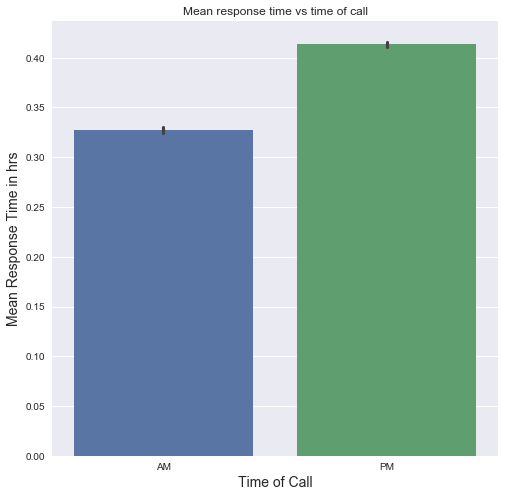

In [118]:
# Plot to visualize mean response time during AM and PM
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='Time of Call',y='TotalResponseTime(hrs)',data=dpd)
ax.set_title("Mean response time vs time of call")
ax.set_xlabel('Time of Call',fontsize=14)
ax.set_ylabel('Mean Response Time in hrs',fontsize=14)

Higher mean response time in PM. I assume there are outliers in the dataset. Let's validate that!!!!

In [115]:
# Pulling the values from TotalResponseTime(hrs) column in separate pandas dataframe and reseting the index.
responseTime=pd.DataFrame(dpd['TotalResponseTime(hrs)'])
responseTime.reset_index(inplace=True)
responseTime.head()

,index,TotalResponseTime(hrs)
0,0,0.000000
1,1,0.221667
2,2,0.000000
3,3,0.000000
4,4,0.000000


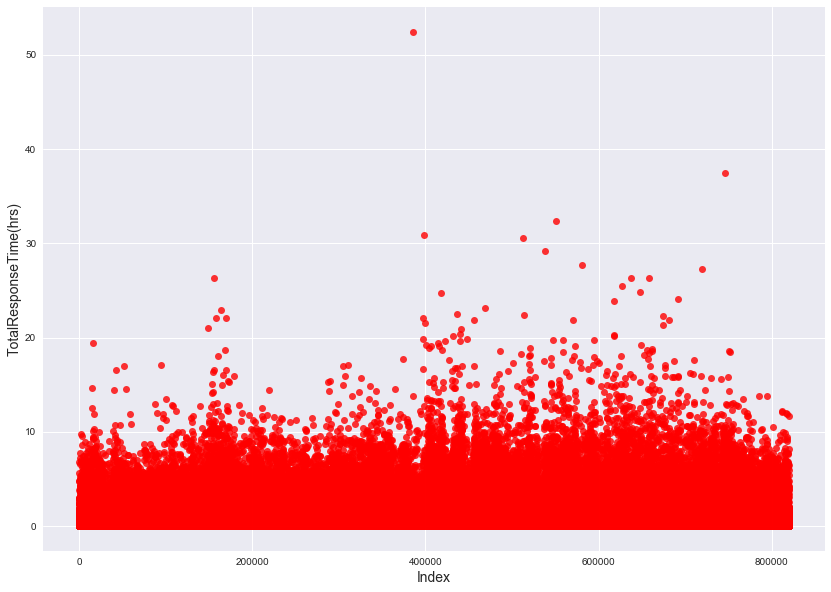

In [117]:
#Plot to visualize outliers in response time
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(14, 10))
sns.set_color_codes("pastel")
sns.regplot(x="index", y="TotalResponseTime(hrs)", data=responseTime,fit_reg=False,color='red')
ax_set_title
ax.set_xlabel('Index',fontsize=14)
ax.set_ylabel('TotalResponseTime(hrs)',fontsize=14)

Clearly there are outliers which is visible from the following box plot as well!

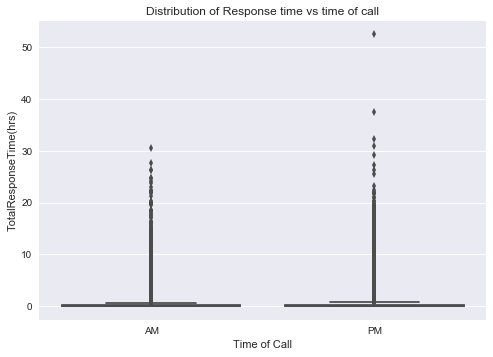

In [124]:
# Box plot to visualize response time distributions.
ax = sns.boxplot(x="Time of Call", y="TotalResponseTime(hrs)", data=dpd)
ax.set_title('Distribution of Response time vs time of call',fontsize=14)

Lets take a look the calls with more than 30 hours of total response time.

In [134]:
dpd[dpd['TotalResponseTime(hrs)']>30][['Timestamp','Month','Agency','Call Description','Neighborhood','Priority','Officer Initiated','Time of Call','TotalResponseTime(hrs)','Total Response Time','Intake Time','Dispatch Time','Travel Time']]

,Timestamp,Month,Agency,Call Description,Neighborhood,Priority,Officer Initiated,Time of Call,TotalResponseTime(hrs),Total Response Time,Intake Time,Dispatch Time,Travel Time
386080,01/09/2017 08:34:48 PM,Jan,DPD,ONE DOWN OR OVER THE WHEEL,NaN,2.0,No,PM,52.426667,3145.6,3144.3,0.3,0.0
397850,11/05/2016 06:03:52 PM,Nov,DPD,RECOVER AUTO,NaN,3.0,No,PM,30.833333,1850.0,3.5,1834.1,11.9
512668,09/21/2016 01:59:36 AM,Sep,DPD,NARCOTICS I/P,Gratiot Woods,3.0,No,AM,30.610000,1836.6,0.0,1826.3,10.2
550264,09/20/2016 02:10:15 PM,Sep,DPD,INVESTIGATE PERSON,Franklin Park,3.0,No,PM,32.325000,1939.5,3.2,1931.0,4.9
746268,07/03/2017 10:20:49 PM,July,DPD,ANIMAL COMPLAINT,Outer Drive-Hayes,5.0,No,PM,37.438333,2246.3,5.2,2237.7,3.4


Although being a high priority call it took 3145.6 minutes(52.5 hours) on Jan 9, 2017 for DPD to respond to an emergency call(not initiated by Officer). Such high response time was due to very high intake time.

There are other high response time cases as well due to high dispatch time. 

It is worth noticing that such high response time(outlier) calls are the ones that are made in the late afternoon or evening which is also confirmed by the above two visualizations for outliers.



#### Question: What can we say about emergency 911 calls that are not initiated by officers? What were the top reasons for such calls in 2016, 2017 and 2018 seperately?

Lets's gain some insights on emergency 911 calls which are not initiated by police officers. They are rather initiated by general public.

In [135]:
# Lets cull the data for the same
ecalls=dpd[dpd['Officer Initiated'] == 'No']

In [136]:
# Check out the missing values 
print "No. of missing values in different columns:"
ecalls.apply(check_missing)

No. of missing values in different columns:


Incident ID                     0
Agency                          0
Incident Address                0
Zip Code                        0
Priority                        0
Call Code                       0
Call Description                0
Category                        0
Timestamp                       0
Time of Call                    0
Precinct/Scout Car Area         0
Responding Unit            371540
Officer Initiated               0
Intake Time                 16812
Dispatch Time               97778
Travel Time                113397
Total Response Time             0
Time On Scene              115494
Total Time                  99189
Neighborhood                15049
Census Block GEOID           8035
Council District            13910
Longitude                    8024
Latitude                     8024
Incident Location            8024
Year                            0
Month                           0
DayofWeek                       0
TotalResponseTime(hrs)          0
dtype: int64

Although the dataset contains data for only three months in 2016 and less than one complete month in 2018, looking at top reasons for emergency calls for the year 2016, 2017 and 2018 seperately may give us insights into reasons for such calls.

                 Reason  TotalCalls
0           DISTURBANCE       14259
1   ASSAULT AND BATTERY        8784
2       UNKNOWN PROBLEM        5732
3    INVESTIGATE PERSON        5302
4  FELONIOUS ASSAULT IP        4261


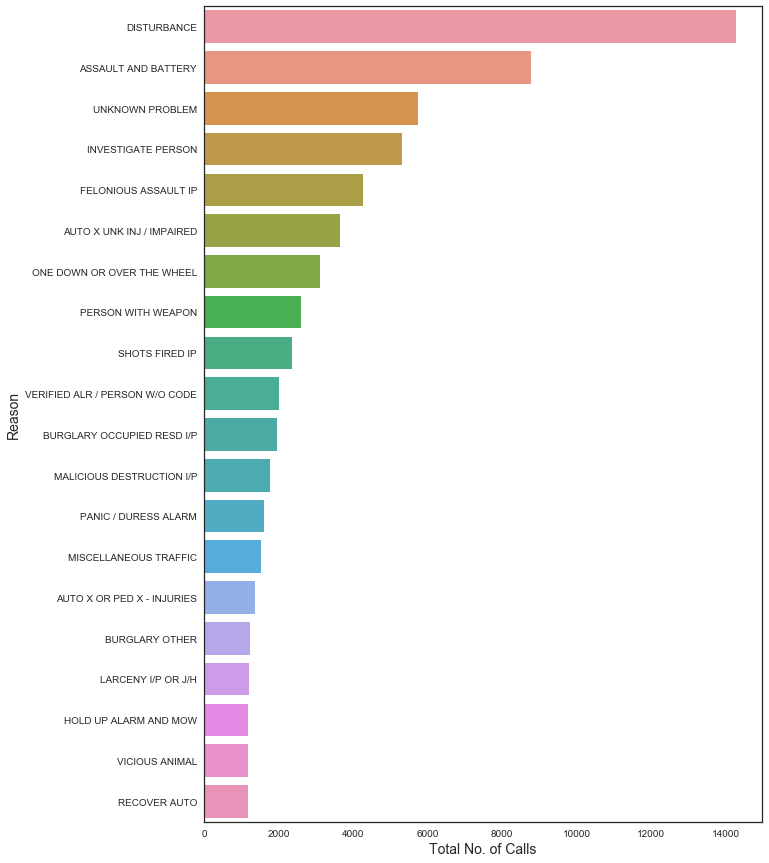

In [137]:
# Plot to visualize top 20 reasons for emrgency calls in 2016
emergencyCalls2016=ecalls[ecalls['Year']=='2016']['Call Description'].value_counts()
emergencyCalls2016=pd.DataFrame(emergencyCalls2016)
emergencyCalls2016.reset_index(inplace=True)
emergencyCalls2016.rename(columns={'index':'Reason','Call Description':'TotalCalls'},inplace=True)
print emergencyCalls2016.head()

sns.set(style="white")
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(x="TotalCalls", y="Reason", data=emergencyCalls2016.head(20),
            label="TotalCalls in 2016")
ax.set_xlabel('Total No. of Calls',fontsize=14)
ax.set_ylabel('Reason',fontsize=14)

                 Reason  TotalCalls
0           DISTURBANCE       53682
1   ASSAULT AND BATTERY       31841
2       UNKNOWN PROBLEM       24093
3    INVESTIGATE PERSON       18424
4  FELONIOUS ASSAULT IP       18193


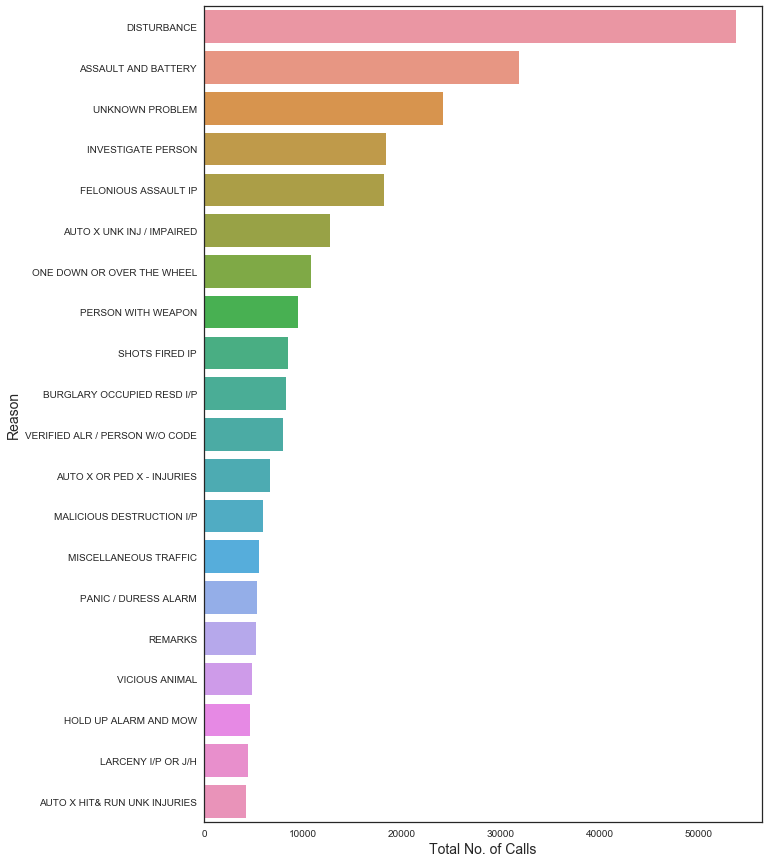

In [138]:
# Plot to visualize top 20 reasons for emrgency calls in 2017
emergencyCalls2017=ecalls[ecalls['Year']=='2017']['Call Description'].value_counts()
emergencyCalls2017=pd.DataFrame(emergencyCalls2017)
emergencyCalls2017.reset_index(inplace=True)
emergencyCalls2017.rename(columns={'index':'Reason','Call Description':'TotalCalls'},inplace=True)
print emergencyCalls2017.head()

sns.set(style="white")
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("muted")
sns.barplot(x="TotalCalls", y="Reason", data=emergencyCalls2017.head(20),
            label="TotalCalls in 2017")
ax.set_xlabel('Total No. of Calls',fontsize=14)
ax.set_ylabel('Reason',fontsize=14)

                      Reason  TotalCalls
0                DISTURBANCE        3511
1        ASSAULT AND BATTERY        2017
2            UNKNOWN PROBLEM        1978
3         INVESTIGATE PERSON        1123
4  AUTO X UNK INJ / IMPAIRED        1095


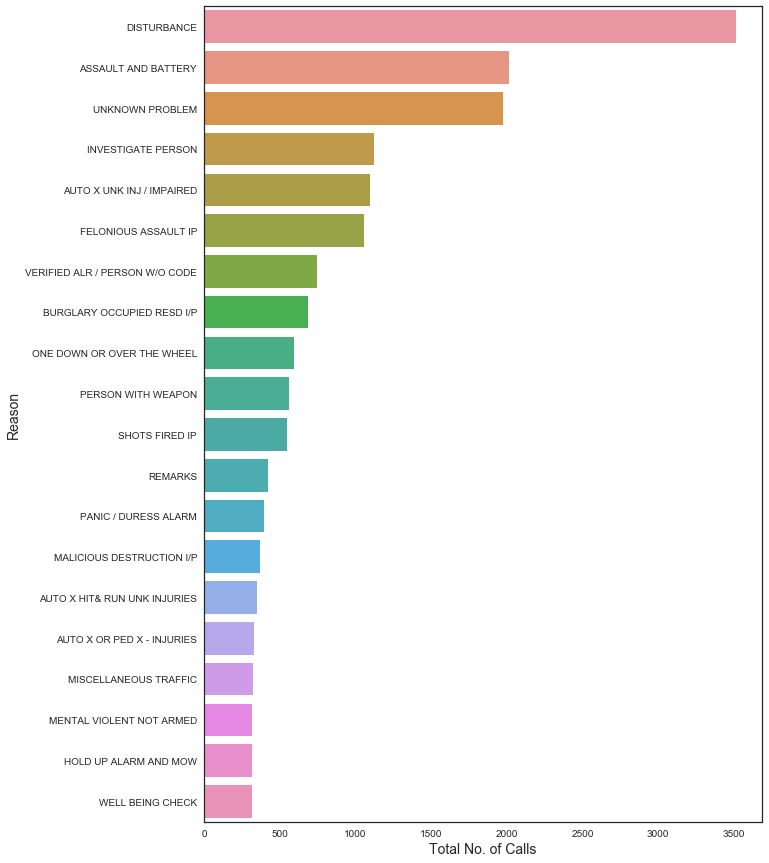

In [139]:
# Plot to visualize top 20 reasons for emrgency calls in 2018
emergencyCalls2018=ecalls[ecalls['Year']=='2018']['Call Description'].value_counts()
emergencyCalls2018=pd.DataFrame(emergencyCalls2018)
emergencyCalls2018.reset_index(inplace=True)
emergencyCalls2018.rename(columns={'index':'Reason','Call Description':'TotalCalls'},inplace=True)
print emergencyCalls2018.head()

sns.set(style="white")
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("muted")
sns.barplot(x="TotalCalls", y="Reason", data=emergencyCalls2018.head(20),
            label="TotalCalls in 2018")
ax.set_xlabel('Total No. of Calls',fontsize=14)
ax.set_ylabel('Reason',fontsize=14)

In [140]:
print "{} unique reasons for emergency calls".format(len(ecalls['Call Description'].unique()))

216 unique reasons for emergency calls


In [141]:
# Value counts for top 20 emergency calls
ecalls['Category'].value_counts().head(20)

DISTURB     71452
AB          42642
UNKPROB     31803
INVPERS     24849
FA IP       23508
ACCUNK      17491
OD          14539
WEAPON      12687
SHOTS IP    11441
HI1 I/P     10937
VERALRM     10752
ACCINJ       8407
MDPIP        8044
MISCTRAF     7418
PANIC        7326
REMARKS      6877
VICANML      6261
HOLDUP       6119
LARCENY      5925
HRUNK        5710
Name: Category, dtype: int64

#### Question: How quickly did DPD respond to 911 emergency calls because of shootings? Which day and in which neighborhoods did the shootings mostly happen?

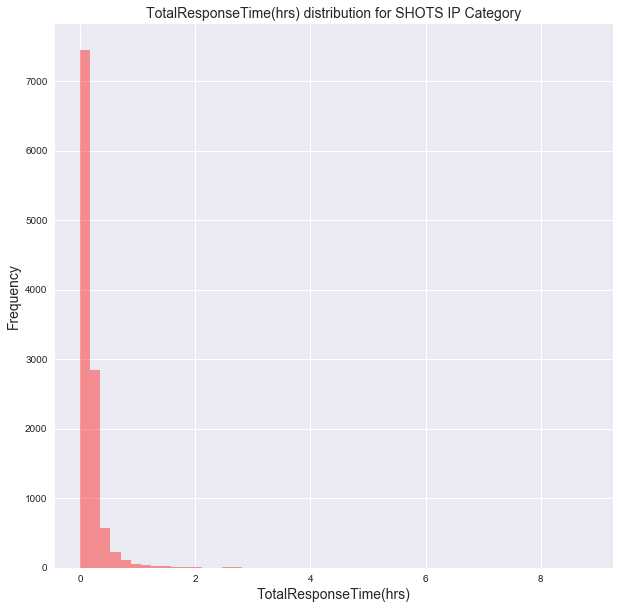

In [143]:
# Plot to visualize total resposne time distribution for calls of SHOTS IP category
sns.set(style="darkgrid")
x=ecalls[ecalls['Category'] =='SHOTS IP']['TotalResponseTime(hrs)'].values
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.distplot(x,kde=False,color='red')
ax.set_xlabel('TotalResponseTime(hrs)',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)
ax.set_title('TotalResponseTime(hrs) distribution for SHOTS IP Category',fontsize=14)

It feels safe to find that DPD responds fairky quickly when ever there is a shooting in the city of Detroit!!!

Let's find out more about when these shootings actually happen.

         Day  TotalCalls
0     Sunday        2314
1   Saturday        2114
2     Monday        1588
3     Friday        1510
4    Tuesday        1346
5   Thursday        1285
6  Wednesday        1284


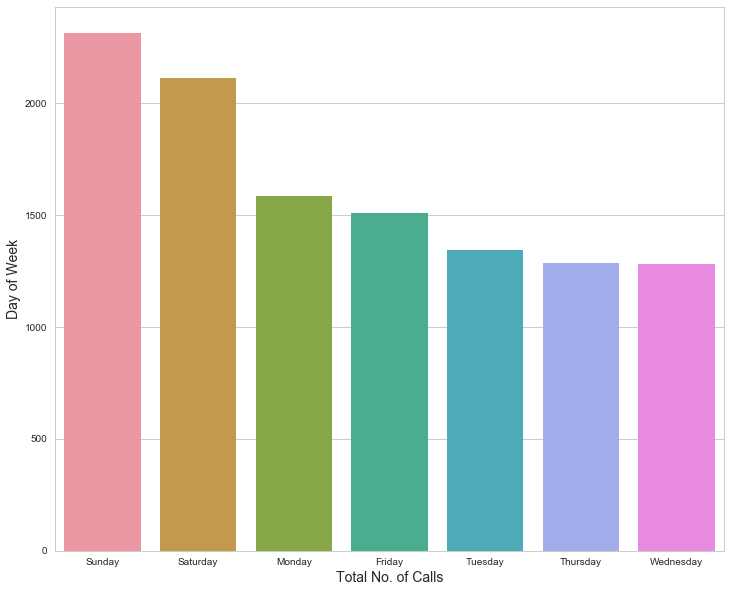

In [144]:
shots=ecalls[ecalls['Call Description'] =='SHOTS FIRED IP']['DayofWeek'].value_counts()
shots = pd.DataFrame(shots)
shots.reset_index(inplace=True)
shots.rename(columns={'index':'Day','DayofWeek':'TotalCalls'},inplace=True)
print shots

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))
sns.set_color_codes("dark")
sns.barplot(x="Day", y="TotalCalls", data=shots,
            label="TotalCalls vs Day of Week")
ax.set_xlabel('Total No. of Calls',fontsize=14)
ax.set_ylabel('Day of Week',fontsize=14)

Shootings mostly in the weekends. Interesting fact!!! I am curious to find out the neighborhoods in Detroit where most of these shots are fired.

In [341]:
#Plot to visualize top neighborhoods where most of the shootings happen
shotsdf=ecalls[ecalls['Call Description'] =='SHOTS FIRED IP']['Neighborhood'].value_counts()
shotsdf=shotsdf.head(20)

shotsDf = [go.Bar(
            x=shotsdf.index,
            y=shotsdf.values,            
)]

layout = go.Layout(
    title="Top 20 neighborhoods with highest no. of Shooting's 911 calls from Sep,2016 to Jan,2018",
)

fig5 = go.Figure(data=shotsDf, layout=layout)

py.iplot(fig5,filename='shotsDf-bar')

#### Question : Which neighborhoods have had the highest no. of 911 calls (both emergency and officer initiated)?

In [338]:
#Plot to visualize top neighborhoods where most of the emergency calls are made.
eneigh =ecalls['Neighborhood'].value_counts()
eneigh=eneigh.head(20)

eneighsDf = [go.Bar(
            x=eneigh.index,
            y=eneigh.values,            
)]

layout = go.Layout(
    title="Top 20 neighborhoods with highest emergency 911 calls from Sep,2016 to Jan,2018",
)

fig4 = go.Figure(data=eneighsDf, layout=layout)

py.iplot(fig4,filename='eneighsDf-bar')

In [339]:
#Plot to visualize top neighborhoods where most of the 911 calls are made
neigh =dpd['Neighborhood'].value_counts()
neigh=neigh.head(20)

neighsDf = [go.Bar(
            x=neigh.index,
            y=neigh.values,            
)]

layout = go.Layout(
    title="Top 20 neighborhoods with highest 911 calls from Sep,2016 to Jan,2018",
)

fig1 = go.Figure(data=neighsDf, layout=layout)

py.iplot(fig1,filename='neighsDf-bar')

From the above two graphs it is obvious that Wayne State Area has more officer initiated calls than emergency calls intiated by respondents.

Lets look at the top neighborhoods where weapons have been reported. 

#### Question: Which neighborhoods have had reports on weapons or kidnapping?

In [145]:
dpd[dpd['Category'] =='WEAPON  ']['Neighborhood'].value_counts().head(20)

Warrendale               407
Harmony Village          268
Outer Drive-Hayes        243
Regent Park              233
Morningside              213
Oakman Blvd Community    212
Franklin Park            211
Brightmoor               209
Dexter-Linwood           208
Claytown                 204
Barton-McFarland         186
Midwest                  177
Warren Ave Community     168
Pulaski                  163
Moross-Morang            160
Crary/St Marys           159
Cornerstone Village      157
Nolan                    146
Airport Sub              145
Mapleridge               144
Name: Neighborhood, dtype: int64

Warrendale, Harmony Village, Regent Park are top in list.It is very obvious because these areas have had highest no. of shooting as well.

How neighborhoods with maximum no. of Kidnapping Reports?

In [152]:
dpd[dpd['Call Description']=='KIDNAPPING']['Neighborhood'].value_counts().head(20)

Warrendale               58
Midwest                  42
Claytown                 34
Moross-Morang            32
Dexter-Linwood           32
Outer Drive-Hayes        30
Warren Ave Community     29
Regent Park              28
Barton-McFarland         28
Airport Sub              26
Cornerstone Village      26
Oakman Blvd Community    25
Brightmoor               24
Greenfield               24
Morningside              23
Joy Community            22
Harmony Village          22
Franklin Park            22
Schulze                  21
Mapleridge               21
Name: Neighborhood, dtype: int64

Warrendale, Midwest, Claytown are top in the list for kidnapping.

#### Final Thoughts:

The above analysis may give its readers signification insights into when and from where most of the 911 calls have been initiated. There were lot of missing values and negative values in response time column. Considering those corrections(replacing missing values & negative values with zeros) this analysis can also provide a fair sense of how long does Detroit Police takes to respond to such calls. 


Besides other analysis, it was very intuitive to look at the neighborhoods (like Warrendale, Harmony Village, Spring Wells, Regent Park etc) where the maximum of no. of shootings have been reported and that Detroit Police has been responding fairly quickly to such high priority critical calls for service.

Until now I have only explored a subset of questions based on this dataset. Many more intesresting facts like the following questions can be uncovered using this dataset.

1. What has been the overall trend in total response time? Has it improved over time? 
2. Are there any variables that are correlated with high response, high dispatch and high intake time?
3. Acquiring more information can help in understanding the factors responsible for high intake and dispatch time.

In future, I would like to extend this project to answer the above questions!!!
